In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

path = 'https://github.com/oregon-data-science/DSCI101/raw/main/data/'

"imports complete" 

'imports complete'

## Ice Cream Survey Results:

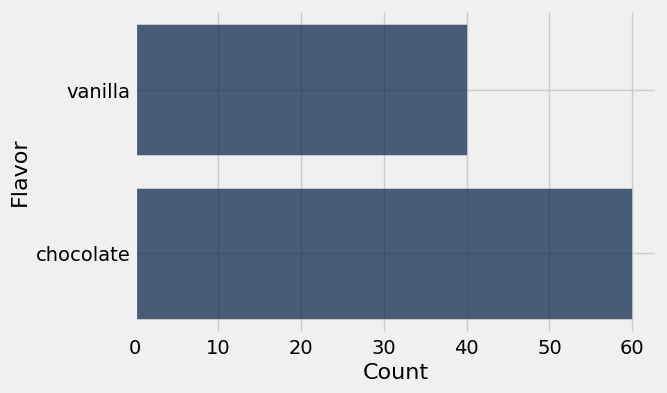

In [185]:
vanilla = 40
chocolate = 60
samp_size = vanilla + chocolate
# how confident are we that these reflect UO students ice cream preferences?

Table().with_columns("Flavor", make_array("vanilla", "chocolate"),
                    "Count", make_array(vanilla, chocolate)).barh("Flavor", "Count")

In [186]:
## our sample:
our_samp = np.repeat([0, 1], [chocolate, vanilla]) ## 1 = prefers vanilla

np.mean(our_samp) ## proportion of sample who prefers vanilla

0.40000000000000002

### Quantifying uncertainty in our estimate

In [187]:
np.mean(np.random.choice(our_samp, size = samp_size, replace=True))

0.35999999999999999

Example of a resample:

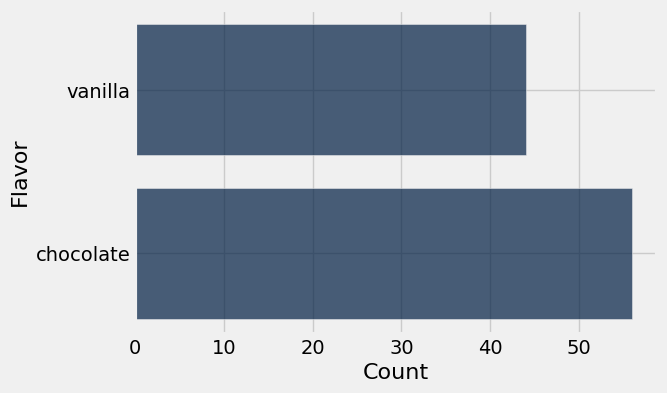

In [188]:
rand_vanilla = np.sum(np.random.choice(our_samp, size = samp_size, replace=True))
Table().with_columns("Flavor", make_array("vanilla", "chocolate"),
                    "Count", make_array(rand_vanilla, samp_size-rand_vanilla)).barh("Flavor", "Count")

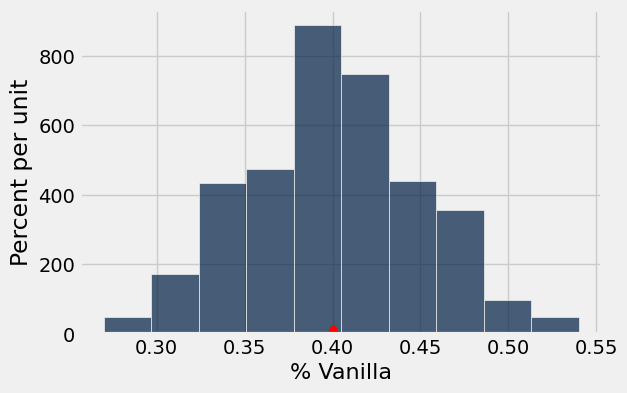

In [189]:
bootstrap_icecream = make_array()

for i in np.arange(1000):
    bootstrap_icecream = np.append(bootstrap_icecream, 
                                   np.mean(np.random.choice(our_samp, size = samp_size, replace=True)))
    
Table().with_column("% Vanilla", bootstrap_icecream).hist()
plots.scatter(x = np.mean(our_samp), y = 0.1, color = "red");

### Calculating Confidence Intervals

In [190]:
left = percentile(2.5, bootstrap_icecream)
right = percentile(97.5, bootstrap_icecream)
left,right

(0.31, 0.5)

In [191]:
print("We are 95% confident, the proportion of UO students who prefer vanilla ice cream is between " + str(round(left*100,2)) + "% and " + str(round(right*100,2)) + "%")

We are 95% confident, the proportion of UO students who prefer vanilla ice cream is between 31.0% and 50.0%


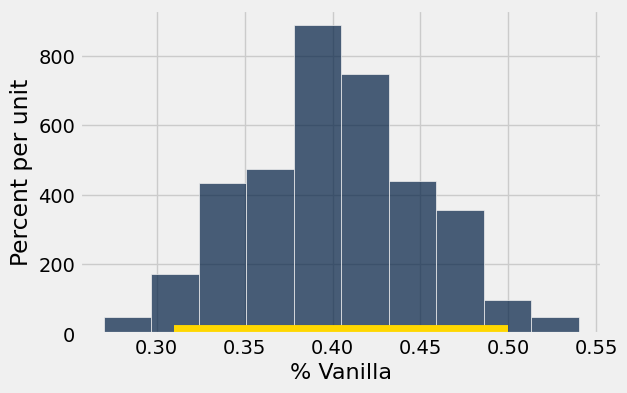

In [192]:
Table().with_column("% Vanilla", bootstrap_icecream).hist()
plots.hlines(y = 0.05, xmin=left, xmax=right, color = "gold", linewidths=10);

## Hypothesis testing

Normal body temperature is 98.6 F. Is this a reasonable population mean? Do we have enough evidence to support that the population mean is close to 98.6 F?

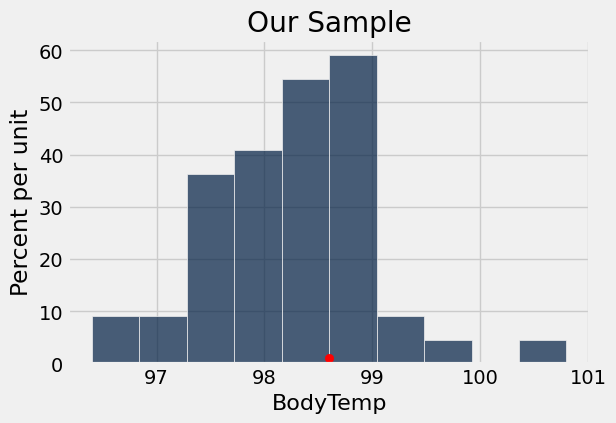

In [2]:
body_temp = Table().read_table("body_temp.csv")
body_temp.hist()
plots.title("Our Sample")
plots.scatter(x = 98.6, y = 0.01, color = "red"); ## our population mean

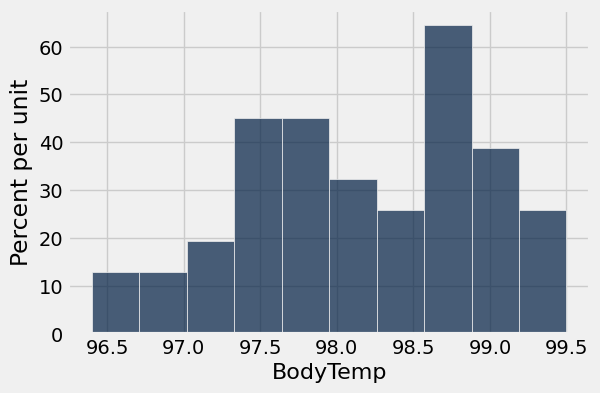

In [16]:
body_temp.sample(with_replacement=True).hist()

### Formulate some hypotheses:

$H_0$ : the population mean is 98.6

$H_1$ : the population mean is not 98.6

If 98.6 falls within our 95% CI interval, we don't reject the null. If it doesn't, we reject the null.

In [ ]:
def one_boot_mean():
    resamp = body_temp.sample(with_replacement=True).column("BodyTemp")
    return np.mean(resamp)

one_boot_mean()

98.191999999999993

0.0

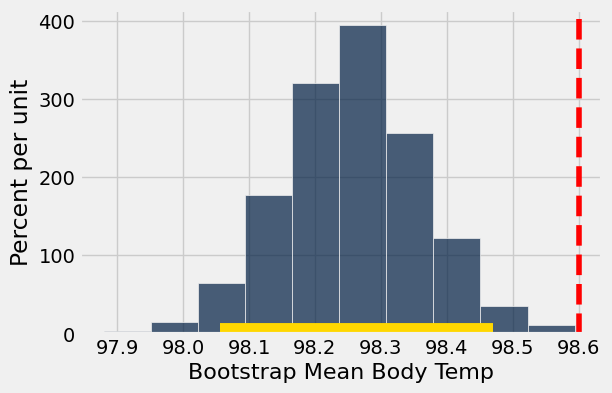

In [195]:
bootstrap_means = make_array()

for i in np.arange(1000):
    bootstrap_means = np.append(bootstrap_means, one_boot_mean())

left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

Table().with_column("Bootstrap Mean Body Temp", bootstrap_means).hist()
plots.axvline(x = 98.6, linestyle = "dashed", color = "red")
plots.hlines(y = 0.05, xmin=left, xmax=right, color = "gold", linewidths=10);

sum(bootstrap_means >= 98.6)/1000

In [196]:
# back to slides

## Distributions

Central Limit Theorem: probability distribution of the sum or average of a large random sample drawn with replacement will be roughly normal, regardless of the distribution of the population from which the sample is drawn.


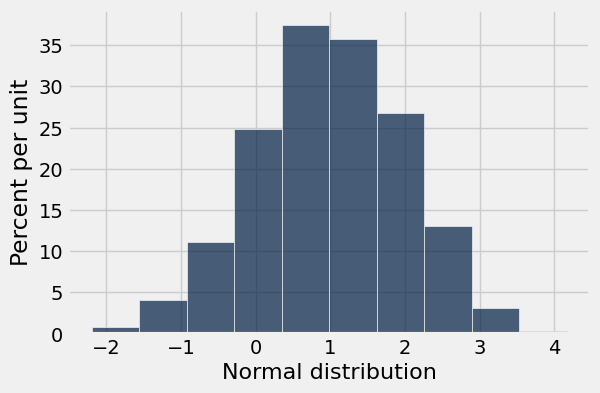

In [197]:
norm = np.random.normal(1, 1, 1000)
Table().with_column("Normal distribution", norm).hist()

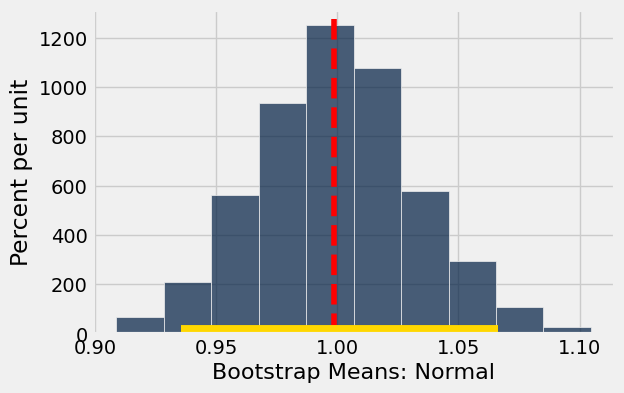

In [198]:
def one_boot_mean(arr):
    resamp = np.random.choice(arr, size = 1000, replace=True)
    return np.mean(resamp)

bootstrap_means = make_array()

for i in np.arange(1000):
    bootstrap_means = np.append(bootstrap_means, one_boot_mean(norm))
    
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)
Table().with_column("Bootstrap Means: Normal", bootstrap_means).hist()
plots.axvline(x = np.mean(norm), linestyle = "dashed", color = "red")
plots.hlines(y = 0.05, xmin=left, xmax=right, color = "gold", linewidths=10);

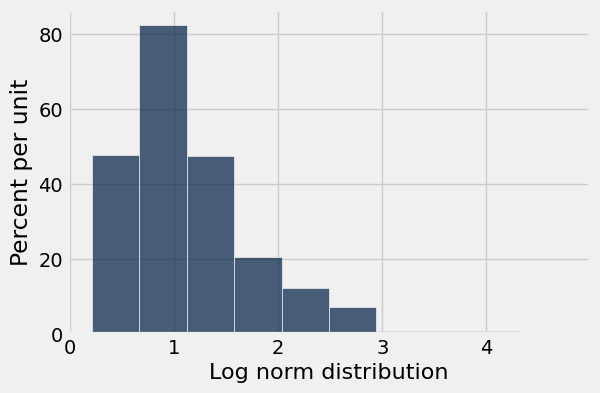

In [205]:
lognorm = np.random.lognormal(0, 0.5, 1000)

Table().with_column("Log norm distribution", lognorm).hist()

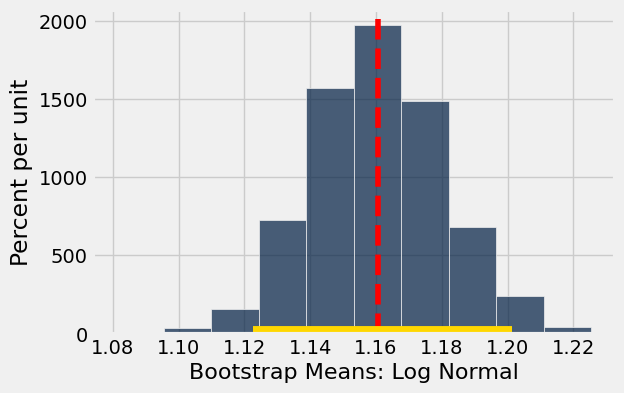

In [202]:
bootstrap_means = make_array()

for i in np.arange(1000):
    bootstrap_means = np.append(bootstrap_means, one_boot_mean(lognorm))

left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

Table().with_column("Bootstrap Means: Log Normal", bootstrap_means).hist()
plots.axvline(x = np.mean(lognorm), linestyle = "dashed", color = "red")
plots.hlines(y = 0.05, xmin=left, xmax=right, color = "gold", linewidths=10);

In [ ]:
# back to slides